In [178]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from rlhfutils.rl_utils import get_synth_rewards
from tqdm import tqdm
from datasets import Dataset, concatenate_datasets

In [179]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [373]:
# tlog = pd.read_json("../../outputs/bagofwords/dynarmlogs/expbow50_updatereprod_fix.jsonl", orient='records', lines=True)
tlog = pd.read_json("../../active-rlhf/outputs/results/dynarmlogs/math/tiny_rm_conf8repeasy1v2.jsonl", orient='records', lines=True, nrows=64000)
# tlog = pd.read_json("../../active-rlhf/outputs/results/rollouts/math/ppo_goldb8easy2.jsonl", orient='records', lines=True, nrows=64000)

# tlog = pd.read_json("../../activereprod/active-rlhf/outputs/results/dynarmlogs/math/u/prasanns/research/active-rlhf/outputs/models/math/tiny_rm_rand_subsamp_onlymathreprod3.jsonl", orient='records', lines=True)
# tlog = pd.read_json("../outputs/results/dynarmlogs/.jsonl", orient='records', lines=True)
tmp = tlog
if 'golds' not in tmp.keys():
    tmp['golds'] = tmp['rewards']

tmp = tmp.dropna(subset='golds')

In [381]:
tmp.iloc[-1]['texts']

['Question: ((5 + 6) + 3) = \n\nAnswer:                                                                                                   ',
 'Question: ((5 + 6) + 3) = \n\nAnswer:                                                                                                   ']

In [384]:
a = [1,2,3]
b = [1]
for i in zip(a, b):
    print(i)

(1, 1)


In [358]:
# tmp.iloc[-1]['texts']

In [359]:
# tmp['texts'][3103]

In [360]:
rat = 0
ngs = []
accs = []
sind = 0
for ind, row in tmp.iloc[sind:].iterrows():
    # row['golds'] = get_synth_rewards(row['texts'], 'bagofwords')
    if len(row['golds'])==0:
        continue
    if row['golds'][0]==row['golds'][1]:
            continue
    ngs.append(row['golds'])
    if ((row['rewards'][0]>row['rewards'][1])!=(row['golds'][0]>row['golds'][1])):
        rat+=1
        accs.append(0)
    else:
        accs.append(1)
#tmp['golds'] = ngs
print(rat/len(ngs))

0.0


In [361]:
tot, corr = 0, 0
vals = []
interv = 200
for j in range(0, len(accs), interv):
    vals.append(mean(accs[j:j+interv]))
    # # check heuristic accuracy
    # for i, row in tmp.iloc[j:j+interv].iterrows():
    #     # if abs(row['rewards'][0]-row['rewards'][1])>row['thresh']:
    #     if row['golds'][0]==row['golds'][1]:
    #         continue
    #     tot = tot+1
    #     corr += 1 if ((row['rewards'][0]>row['rewards'][1])==(row['golds'][0]>row['golds'][1])) else 0
    # vals.append(corr/tot)

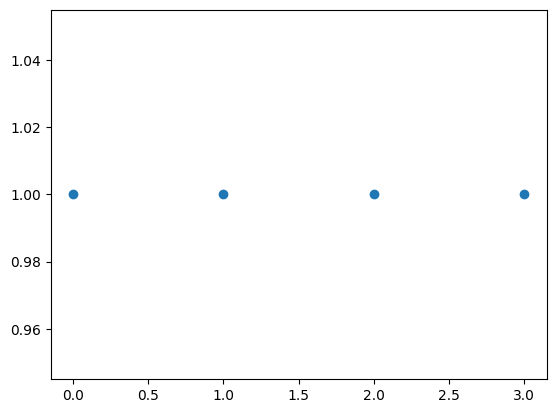

In [362]:
plt.scatter(range(len(vals)), vals)

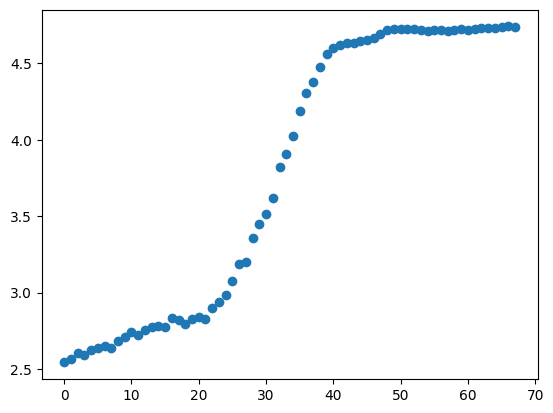

In [363]:
means = [mean(m) for m in ngs]
# means = [mean(m) for m in tmp['rewards']]

interv = 10
mbins = [mean(means[i:i+50]) for i in range(0, len(means), interv)]
plt.scatter(range(len(mbins)), mbins)

In [364]:
mean(means[-20:])

4.740225075180728

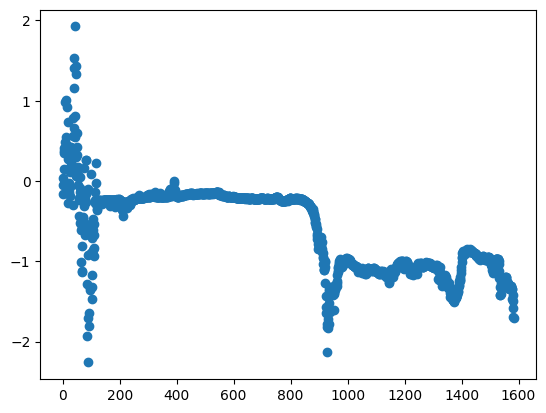

In [42]:
means = [mean(m) for m in tmp['golds']]
plt.scatter(range(len(means)), means)